In [2]:
import pandas as pd

In [5]:
df = pd.read_csv("glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0


In [10]:
df.info

<bound method DataFrame.info of           RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   1.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   1.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   1.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   1.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   1.0
..       ...    ...   ...   ...    ...   ...   ...  ...  ...   ...
994      NaN    NaN   NaN   NaN    NaN   NaN   NaN  NaN  NaN   NaN
995      NaN    NaN   NaN   NaN    NaN   NaN   NaN  NaN  NaN   NaN
996      NaN    NaN   NaN   NaN    NaN   NaN   NaN  NaN  NaN   NaN
997      NaN    NaN   NaN   NaN    NaN   NaN   NaN  NaN  NaN   NaN
998      NaN    NaN   NaN   NaN    NaN   NaN   NaN  NaN  NaN   NaN

[999 rows x 10 columns]>

In [12]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [14]:
df.isnull().sum()

RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64

In [16]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
994     True
995     True
996     True
997     True
998     True
Length: 999, dtype: bool

In [18]:
df.drop_duplicates()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7.0
213,1.51711,14.23,0.00,2.08,73.36,0.00,8.62,1.67,0.0,7.0


In [20]:

# ----------------------------
#  CHECK FOR OUTLIERS USING IQR
# ----------------------------
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()

outlier_report = {col: detect_outliers(col) for col in df.columns[:-1]}

print("\n===== Outlier Count (per Feature) =====")
for col, count in outlier_report.items():
    print(f"{col}: {count} outliers")

# ----------------------------
#  CHECK FOR INCONSISTENCIES
# ----------------------------

# Check if numeric columns have negative values (shouldn't exist)
negatives = (df[df.columns[:-1]] < 0).sum()

print("\n===== Inconsistency Check (Negative Values) =====")
print(negatives)

# Check if categorical column has valid classes (Glass type should be 1–7)
invalid_types = df[~df['Type'].between(1,7)]
print("\n===== Invalid Category Values in 'Type' Column =====")
print(invalid_types if len(invalid_types) > 0 else "No invalid category values found.")




===== Outlier Count (per Feature) =====
RI: 17 outliers
Na: 7 outliers
Mg: 0 outliers
Al: 18 outliers
Si: 12 outliers
K: 7 outliers
Ca: 26 outliers
Ba: 38 outliers
Fe: 12 outliers

===== Inconsistency Check (Negative Values) =====
RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64

===== Invalid Category Values in 'Type' Column =====
     RI  Na  Mg  Al  Si   K  Ca  Ba  Fe  Type
214 NaN NaN NaN NaN NaN NaN NaN NaN NaN   NaN
215 NaN NaN NaN NaN NaN NaN NaN NaN NaN   NaN
216 NaN NaN NaN NaN NaN NaN NaN NaN NaN   NaN
217 NaN NaN NaN NaN NaN NaN NaN NaN NaN   NaN
218 NaN NaN NaN NaN NaN NaN NaN NaN NaN   NaN
..   ..  ..  ..  ..  ..  ..  ..  ..  ..   ...
994 NaN NaN NaN NaN NaN NaN NaN NaN NaN   NaN
995 NaN NaN NaN NaN NaN NaN NaN NaN NaN   NaN
996 NaN NaN NaN NaN NaN NaN NaN NaN NaN   NaN
997 NaN NaN NaN NaN NaN NaN NaN NaN NaN   NaN
998 NaN NaN NaN NaN NaN NaN NaN NaN NaN   NaN

[785 rows x 10 columns]


<Figure size 1200x1000 with 0 Axes>

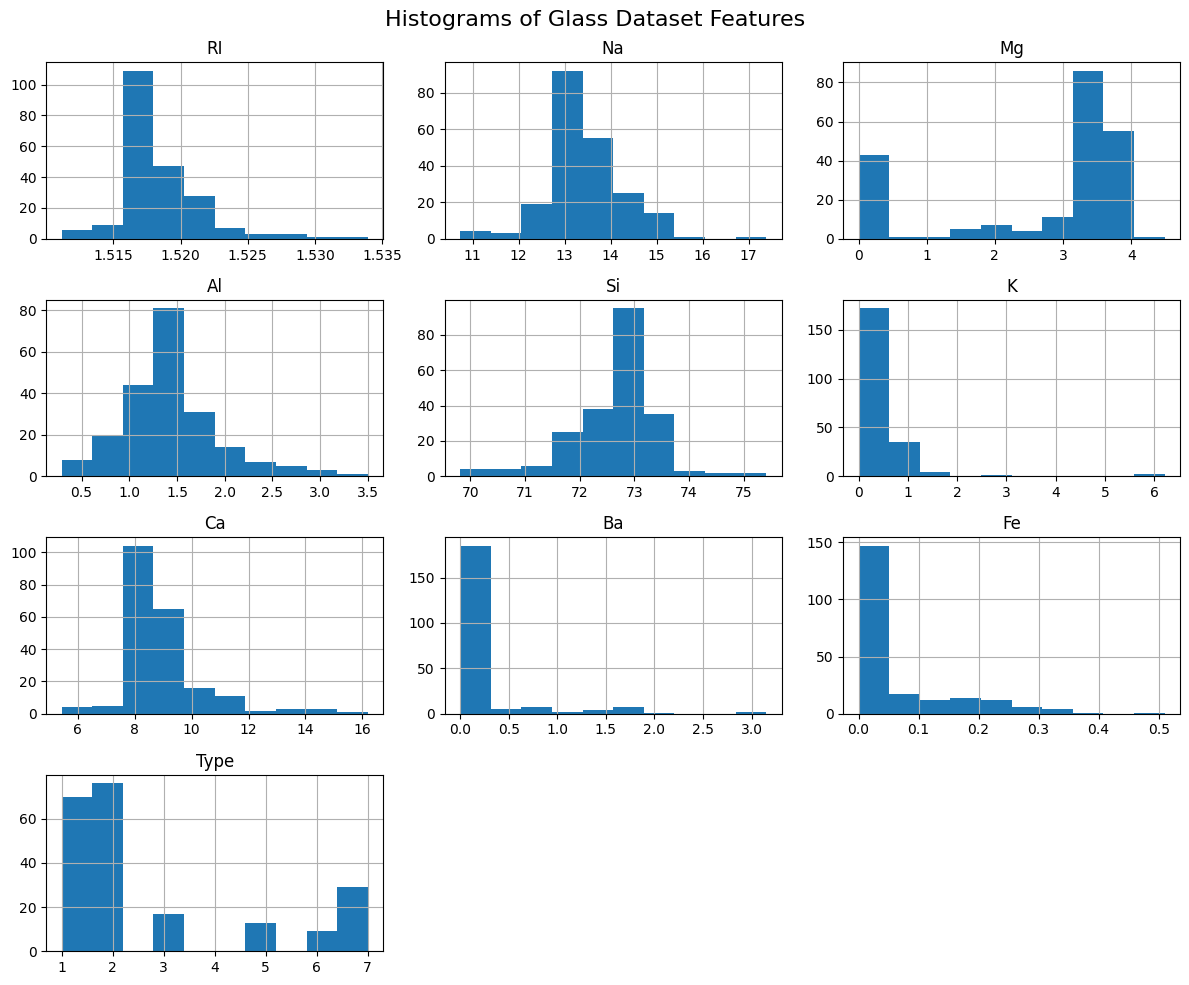

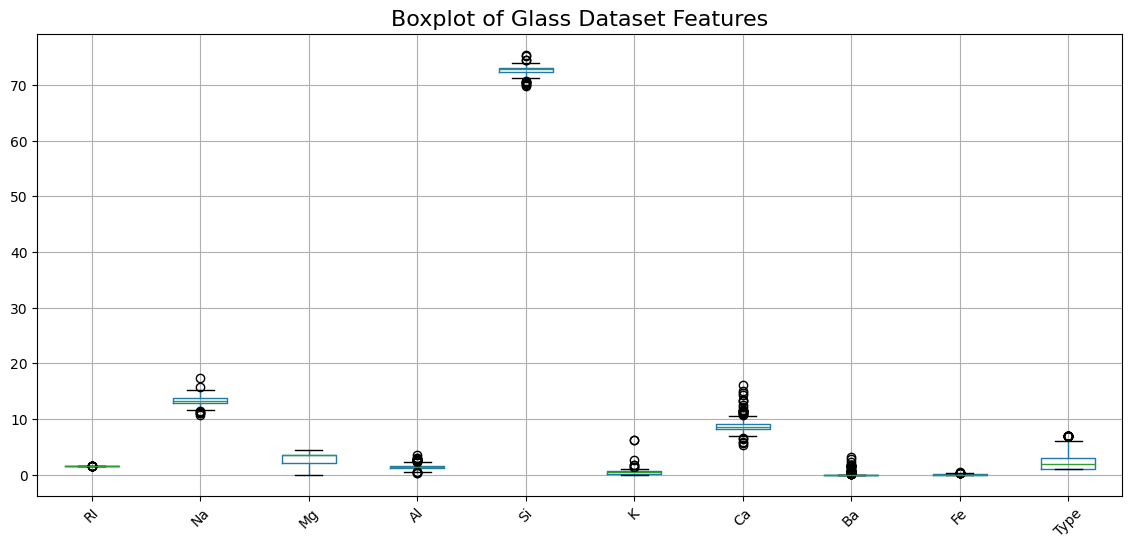

<Figure size 1400x1400 with 0 Axes>

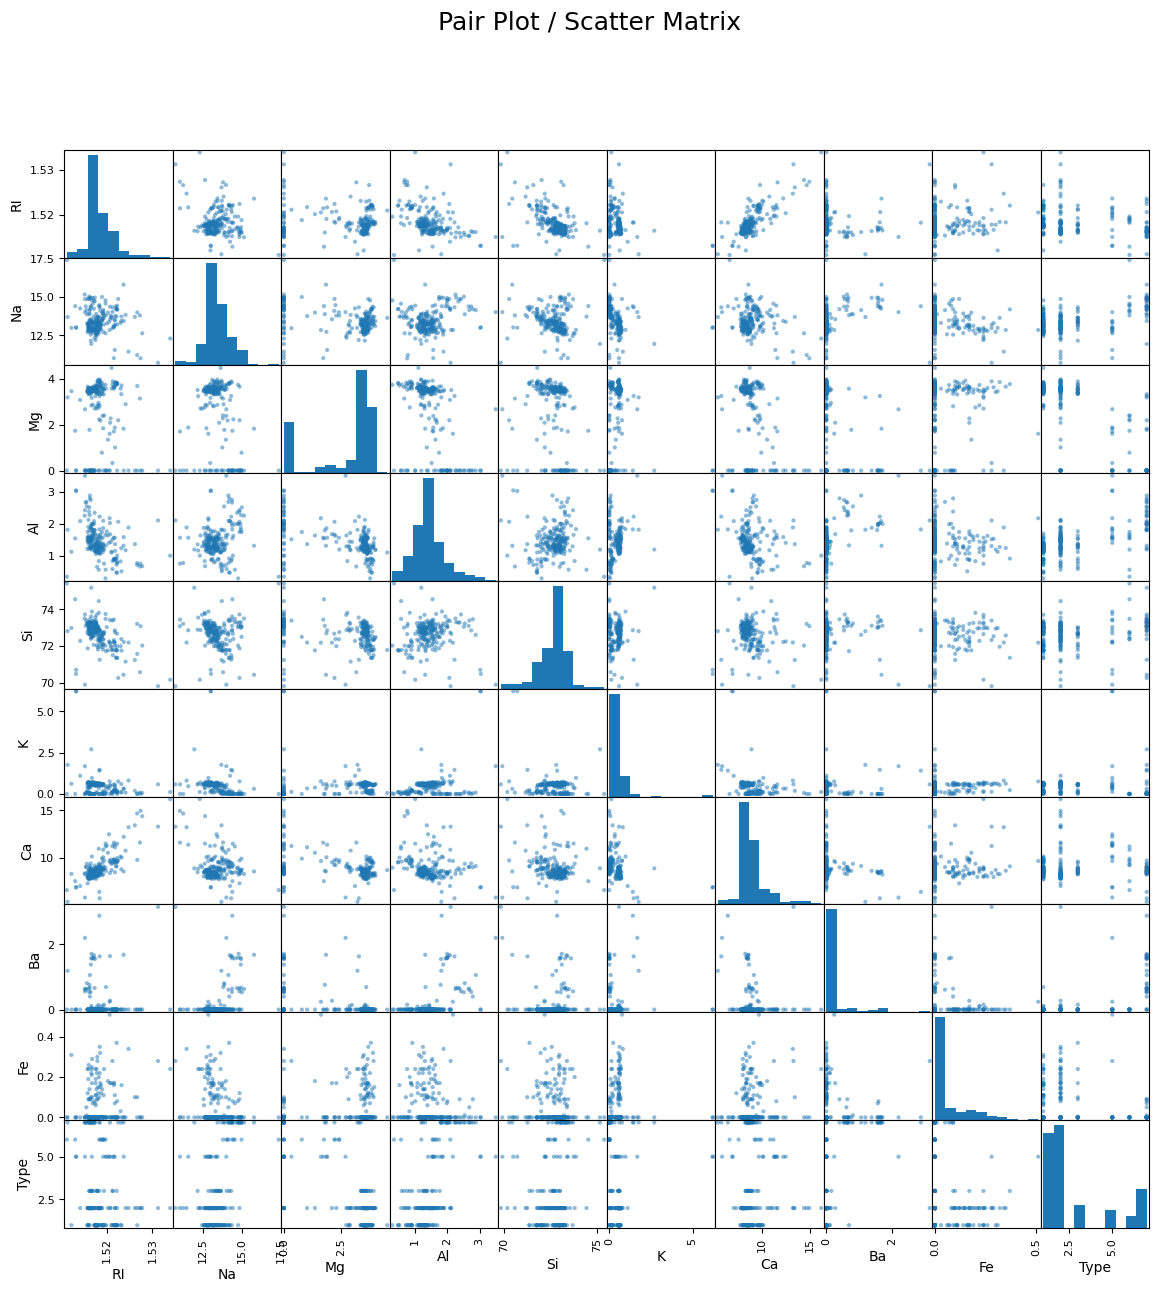

In [22]:

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Load dataset
df = pd.read_csv('glass.csv')

# -------- Histogram for each feature --------
plt.figure(figsize=(12, 10))
df.hist(figsize=(12, 10))
plt.suptitle("Histograms of Glass Dataset Features", fontsize=16)
plt.tight_layout()
plt.show()

# -------- Boxplots to detect outliers --------
plt.figure(figsize=(14, 6))
df.boxplot(rot=45)
plt.title("Boxplot of Glass Dataset Features", fontsize=16)
plt.show()

# -------- Pair Plot / Scatter Matrix --------
plt.figure(figsize=(14, 14))
scatter_matrix(df, figsize=(14, 14), diagonal='hist')
plt.suptitle("Pair Plot / Scatter Matrix", fontsize=18)
plt.show()


In [24]:
""" RI-Ca Having the positive relationship,RI-Si having the strong negative relationship,Ca-Na having the positive relationship,Mg-Type having the strong negative realtionship,Ba-Type having the strong relationship"""

' RI-Ca Having the positive relationship,RI-Si having the strong negative relationship,Ca-Na having the positive relationship,Mg-Type having the strong negative realtionship,Ba-Type having the strong relationship'

In [26]:
df.isnull().sum()

RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64

In [66]:
# ------------------------------
#  HANDLING STRATEGY
# ------------------------------
# Since the Glass dataset typically has NO missing values, we check first:

if df.isnull().sum().sum() == 0:
    print("\n No missing values found. No imputation needed.")
else:
    print("\n Missing values detected. Applying imputation...")

    # Strategy: Numeric columns → fill with mean
    #           Categorical column (Type) → fill with mode
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = df.select_dtypes(include='object').columns

    # Fill numeric missing values with mean
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

    # Fill categorical missing values with most frequent value (mode)
    for col in categorical_cols:
        df[col] = df[col].fillna(df[col].mode()[0])

    print("\n✔ Missing values handled successfully.")

# ------------------------------
# OPTIONAL - VERIFY CLEAN DATA
# ------------------------------
print("\nMissing values after handling:")
print(df.isnull().sum())



 Missing values detected. Applying imputation...

✔ Missing values handled successfully.

Missing values after handling:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [67]:
# Identify categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index([], dtype='object')

In [68]:
# there is no categorical data so we do not apply encoding methods

In [69]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Separate features and target
X = df.drop('Type', axis=1)   # Independent variables
y = df['Type']  
#  Standardization (recommended for algorithms like SVM, Logistic Regression, Neural Networks)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [70]:
from sklearn.model_selection import train_test_split

# -------------------------------
# Train-Test Split on Resampled Data
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42)

print("\nFinal Training and Testing Shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)



Final Training and Testing Shapes:
X_train: (799, 9)
X_test: (200, 9)
y_train: (799,)
y_test: (200,)


In [71]:
# We cant perform Random forest classifier on numerical data 

In [72]:
df["Type"].isnull().sum()

np.int64(0)

In [79]:
# we can't apply random forest classifier because it it a continuous data

In [80]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


# Initialize Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the model
rf_reg.fit(X_train, y_train)

# Predict values
y_pred = rf_reg.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" Random Forest Regressor Results")
print("----------------------------------")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


 Random Forest Regressor Results
----------------------------------
Mean Squared Error (MSE): 0.0425
R² Score: 0.9526


In [82]:
# we can't perform the accuracy,precision,recall and f1-score on the regression model.

In [87]:
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# -----------------------------
# Model Setup
# -----------------------------

# Bagging Regressor with Decision Tree
bagging_reg = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=200,
    random_state=42
)

# AdaBoost Regressor
adaboost_reg = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=3),
    n_estimators=200,
    random_state=42
)

# Gradient Boosting Regressor
gboost_reg = GradientBoostingRegressor(
    n_estimators=200,
    random_state=42
)

# Random Forest Regressor (Boosting-type ensemble baseline)
rf_reg = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

models = {
    "Bagging Regressor": bagging_reg,
    "AdaBoost Regressor": adaboost_reg,
    "Gradient Boosting Regressor": gboost_reg,
    "Random Forest Regressor": rf_reg
}

# -----------------------------
# Train, Predict, Evaluate
# -----------------------------
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MSE": mse, "RMSE": rmse, "R2 Score": r2}

# -----------------------------
# Display Results
# -----------------------------
print("\n====================== Model Comparison ======================\n")
for name, metrics in results.items():
    print(f" {name}")
    print(f"   - MSE: {metrics['MSE']:.4f}")
    print(f"   - RMSE: {metrics['RMSE']:.4f}")
    print(f"   - R² Score: {metrics['R2 Score']:.4f}\n")



====================== Model Comparison ======================

 Bagging Regressor
   - MSE: 0.0443
   - RMSE: 0.2106
   - R² Score: 0.9506

 AdaBoost Regressor
   - MSE: 0.1524
   - RMSE: 0.3904
   - R² Score: 0.8300

 Gradient Boosting Regressor
   - MSE: 0.0781
   - RMSE: 0.2794
   - R² Score: 0.9130

 Random Forest Regressor
   - MSE: 0.0425
   - RMSE: 0.2062
   - R² Score: 0.9526



In [89]:
""" Bagging :It is a type of Ensemble methods. It is used for parallel methods 
Boosting : It is also a Ensemble methods. It is used for sequential methods"""

' Bagging :It is a type of Ensemble methods. It is used for parallel methods \nBoosting : It is also a Ensemble methods. It is used for sequential methods'

In [90]:
""" We can handle the imbalanced data by removing, by replacing with the central tendency or with the near value"""

' We can handle the imbalanced data by removing, by replacing with the central tendency or with the near value'